## Observations and Insights


•	The  original data sets contained duplicate mice in the “study_results” file. The duplicates were removed to create a 
    merged data frame of all the data\
•	The bar chart shows that at the last time point, Capomulin and Ramicane are the most effective drugs with the most number 
    of mice still alive. Propriva seems to be the least effective drug the least number of mice alive\
•	The proportion of male mice was slightly higher in the study compared to female mice at 50.61% and 49.39% respectively\
•	The box and whisker plot shows that Ramicane was the most effective drug showing the least tumor volume\
•	The tumor volume has a positive correlation with mouse weight with a R2 value of 0.84


In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import scipy.stats as st
from sklearn import datasets
import numpy as np
from scipy.stats import linregress

In [3]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


### Studying the raw data files

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
...,...,...,...,...
95,k862,0,45.0,0
96,g867,0,45.0,0
97,s619,0,45.0,0
98,w697,0,45.0,0


### Combining the datasets

In [6]:

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
extract_duplicates_values = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
extract_duplicates_values

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
extract_duplicates = combined_df.loc[combined_df["Mouse ID"] == "g989"]
extract_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = combined_df[~combined_df["Mouse ID"].isin(extract_duplicates_values) == True]
final_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

stats_table_mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename("mean")
stats_table_median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename("median")
stats_table_var = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename("var")
stats_table_std = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename("std")
stats_table_sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename("sem")

In [13]:
pd.concat([stats_table_mean, stats_table_median, stats_table_var, stats_table_std, stats_table_sem], axis=1)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_stat_table_v2 = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_table_v2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plot

In [15]:
bar_plot_grouping = combined_df.groupby(['Drug Regimen', 'Timepoint'])['Mouse ID'].agg(['count'])

bar_plot_grouping.head(11)

count
Drug Regimen Timepoint       
Capomulin    0             25
             5             25
             10            25
             15            24
             20            23
             25            22
             30            22
             35            22
             40            21
             45            21
Ceftamin     0             25

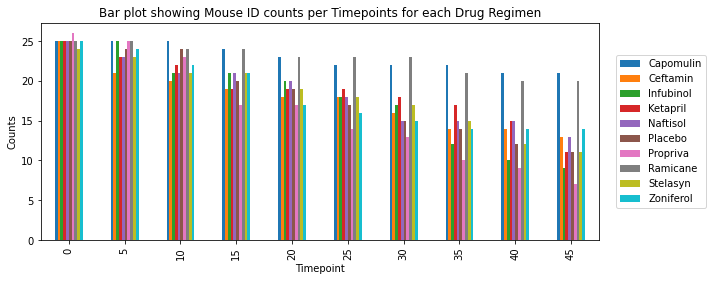

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

cmap = cm.get_cmap('tab10')

bar_plot_pandas = bar_plot_grouping.unstack(0).plot(kind='bar', cmap=cmap, figsize=(10,4),
                            title="Bar plot showing Mouse ID counts per Timepoints for each Drug Regimen",
                            )


patches, labels = bar_plot_pandas.get_legend_handles_labels()

label_list = []

for i in labels:
    label_list.append(i.split()[1][:-1])
    
#or
# label_list = [i.split()[1][:-1] for i in labels]
    
plt.xlabel('Timepoint')
plt.ylabel('Counts')
plt.legend(label_list, loc='right', bbox_to_anchor=(1.2, 0.5));

plt.savefig("Images/01_barchart_pandas.png")

plt.show()


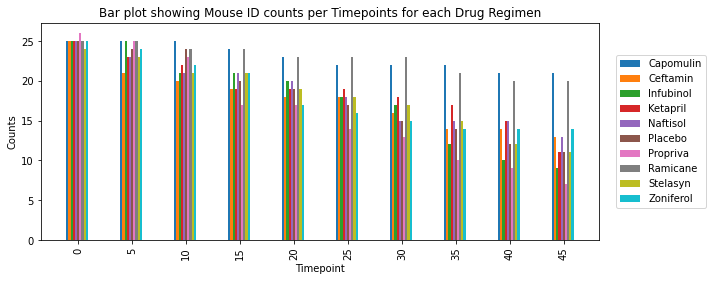

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

fig, ax = plt.subplots(figsize=(10, 4))

column_list = list(bar_plot_grouping.unstack(0).columns.levels[1])

cmap = cm.get_cmap('tab10')

bar_width = 0.2

for num, i in enumerate(column_list):
    ax.bar(bar_plot_grouping.unstack(0).index + num * bar_width - len(bar_plot_grouping.unstack(0).index) / 2 * bar_width, 
           bar_plot_grouping.unstack(0)['count'][i], 
           bar_width, label=i, color=cmap(num))
    
        
plt.title('Bar plot showing Mouse ID counts per Timepoints for each Drug Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Counts')

plt.xticks(bar_plot_grouping.unstack(0).index, rotation='vertical')
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5));

plt.savefig("Images/02_barchart_matplotlib.png")

plt.show()

## Pie Plots

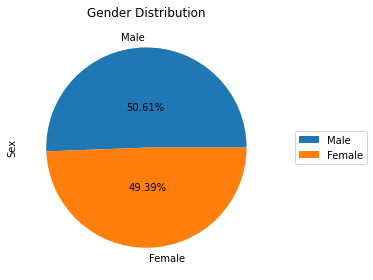

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

combined_df['Sex'].value_counts().plot(kind='pie', figsize=(10, 4),
                                       autopct='%1.2f%%', pctdistance=0.4, title="Gender Distribution")

plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5));

plt.tight_layout()

plt.savefig("Images/03_pieplot_pandas.png")

plt.show()

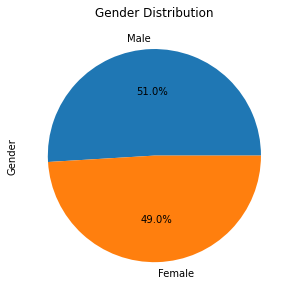

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = final_df['Sex'].value_counts()
counts

plt.pie(counts.values,labels=counts.index.values,autopct="%1.1f%%")

plt.ylabel("Gender")
plt.tight_layout()

plt.title("Gender Distribution")

plt.savefig("Images/04_pieplot_matplotlib.png")

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_tumor = final_df.groupby(['Mouse ID'])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor.merge(final_df,on=['Mouse ID','Timepoint'],how="left")

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

for treatment in treatments:
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol) 

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol<lower_bound) | (tumor_vol>upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


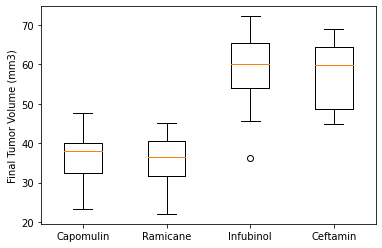

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)

plt.ylabel('Final Tumor Volume (mm3)')

plt.savefig("Images/05_box_and_whisker_plot.png")

plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = final_df.loc[final_df['Drug Regimen']  == 'Capomulin']
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [23]:
# Performing a value counts on the data set to look for a mice with most data

capomulin_df['Mouse ID'].value_counts()

y793    10
v923    10
r554    10
x401    10
s185    10
l897    10
u364    10
m957    10
g316    10
g288    10
m601    10
w914    10
b128    10
s710    10
r944    10
j119    10
t565    10
l509    10
i738    10
b742    10
i557    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [24]:
#Creating a side db for a particular mice to plot in the line plot

selected_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']
selected_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


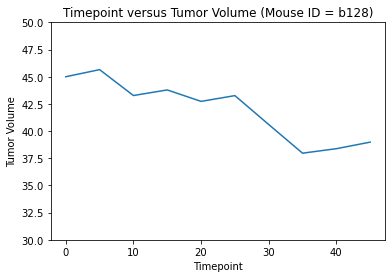

In [25]:
x_axis = selected_mouse['Timepoint']
y_axis = selected_mouse['Tumor Volume (mm3)']


plt.plot(x_axis , y_axis)

plt.ylim((30,50))

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Timepoint versus Tumor Volume (Mouse ID = b128)')
plt.savefig("Images/06_lineplot.png")

plt.show()

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capoulin_mouse = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')

capoulin_mouse.head()


<ipython-input-26-206ddeda73fb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  capoulin_mouse = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


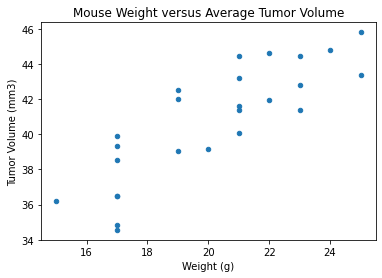

In [27]:
capoulin_mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)');

plt.title('Mouse Weight versus Average Tumor Volume')

plt.savefig("Images/07_scatterplot.png")

plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Mouse_Weight = capoulin_mouse.iloc[:,1]
Tumor_Volume = capoulin_mouse.iloc[:,0]
correlation = st.pearsonr(Mouse_Weight,Tumor_Volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(capoulin_mouse['Weight (g)'], capoulin_mouse['Tumor Volume (mm3)'])
regress_values = capoulin_mouse['Weight (g)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


The correlation between both factors is 0.84
The equation of the line fitted through the data is: y = 0.95x + 21.55


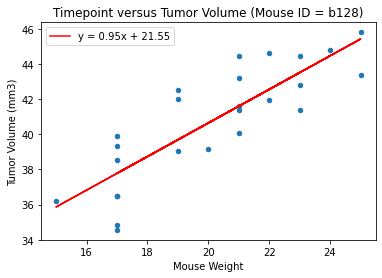

In [29]:
# Add the linear regression equation and line to plot

capoulin_mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(capoulin_mouse['Weight (g)'],regress_values,"r-", label=line_eq)
plt.legend()
plt.xlabel('Mouse Weight')
plt.title('Timepoint versus Tumor Volume (Mouse ID = b128)')

plt.savefig("Images/08_corr_and_line_regression.png")

plt.show()